In [166]:
import torch
from torch import nn
from input.reading_datasets import *
from input.time_series_module import TimeSeriesDataset
import os
from utils_file import *
import seaborn as sns
import matplotlib.pyplot as plt

In [167]:
torch.cuda.is_available()

True

In [168]:
all_datasets = get_all_datasets(read_from_path=True)

Reading from path


In [169]:
complete_data = get_all_results(False)
# complete_data.query("dataset == 'standwalkjump'")

In [170]:
complete_data.query("model_name == 'FullyConvolutionalNetwork1DLate'").query("dataset == 'eigenworms'")

,directory,model_name,dataset,seed,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
219,FullyConvolutionalNetwork1DLate_eigenworms_1,FullyConvolutionalNetwork1DLate,eigenworms,1,1.0,0.826923,2988.0,9223.304334,3.086782
220,FullyConvolutionalNetwork1DLate_eigenworms_2,FullyConvolutionalNetwork1DLate,eigenworms,2,1.0,0.846154,2524.0,6388.041970,2.530920
221,FullyConvolutionalNetwork1DLate_eigenworms_3,FullyConvolutionalNetwork1DLate,eigenworms,3,1.0,0.903846,2787.0,7240.867151,2.598087
222,FullyConvolutionalNetwork1DLate_eigenworms_4,FullyConvolutionalNetwork1DLate,eigenworms,4,1.0,0.923077,2621.0,4115.663702,1.570265
223,FullyConvolutionalNetwork1DLate_eigenworms_5,FullyConvolutionalNetwork1DLate,eigenworms,5,1.0,0.923077,2565.0,4027.761118,1.570277
224,FullyConvolutionalNetwork1DLate_eigenworms_6,FullyConvolutionalNetwork1DLate,eigenworms,6,1.0,0.807692,3532.0,7769.648662,2.199787
225,FullyConvolutionalNetwork1DLate_eigenworms_7,FullyConvolutionalNetwork1DLate,eigenworms,7,1.0,0.846154,2589.0,5234.824862,2.021949
226,FullyConvolutionalNetwork1DLate_eigenworms_8,FullyConvolutionalNetwork1DLate,eigenworms,8,1.0,0.903846,3733.0,5859.964262,1.569773
227,FullyConvolutionalNetwork1DLate_eigenworms_9,FullyConvolutionalNetwork1DLate,eigenworms,9,1.0,0.942308,4906.0,7709.971071,1.571539
228,FullyConvolutionalNetwork1DLate_eigenworms_10,FullyConvolutionalNetwork1DLate,eigenworms,10,1.0,0.884615,2644.0,5499.709627,2.080072


In [171]:
agg_results_data = get_all_results(True)

In [172]:
agg_results_data.query("model_name == 'FullyConvolutionalNetwork1DGAP'")

,dataset,model_name,max_train_accuracy,max_test_accuracy,epochs,execution_time,time_per_epoch
1,articularywordrecognition,FullyConvolutionalNetwork1DGAP,0.998043,0.995652,1223.60,64.587083,0.055665
6,atrialfibrillation,FullyConvolutionalNetwork1DGAP,1.000000,0.433333,2520.50,37.317006,0.014806
11,basicmotions,FullyConvolutionalNetwork1DGAP,1.000000,1.000000,4.60,0.049344,0.010593
16,cricket,FullyConvolutionalNetwork1DGAP,0.981944,1.000000,12.40,0.417166,0.034725
21,eigenworms,FullyConvolutionalNetwork1DGAP,1.000000,0.923077,3117.25,2861.075654,0.934727
26,natops,FullyConvolutionalNetwork1DGAP,0.993403,0.995833,876.30,28.284067,0.033378
31,racketsports,FullyConvolutionalNetwork1DGAP,1.000000,0.936066,2632.20,135.415578,0.051074
36,standwalkjump,FullyConvolutionalNetwork1DGAP,1.000000,0.500000,2527.00,66.115840,0.026158


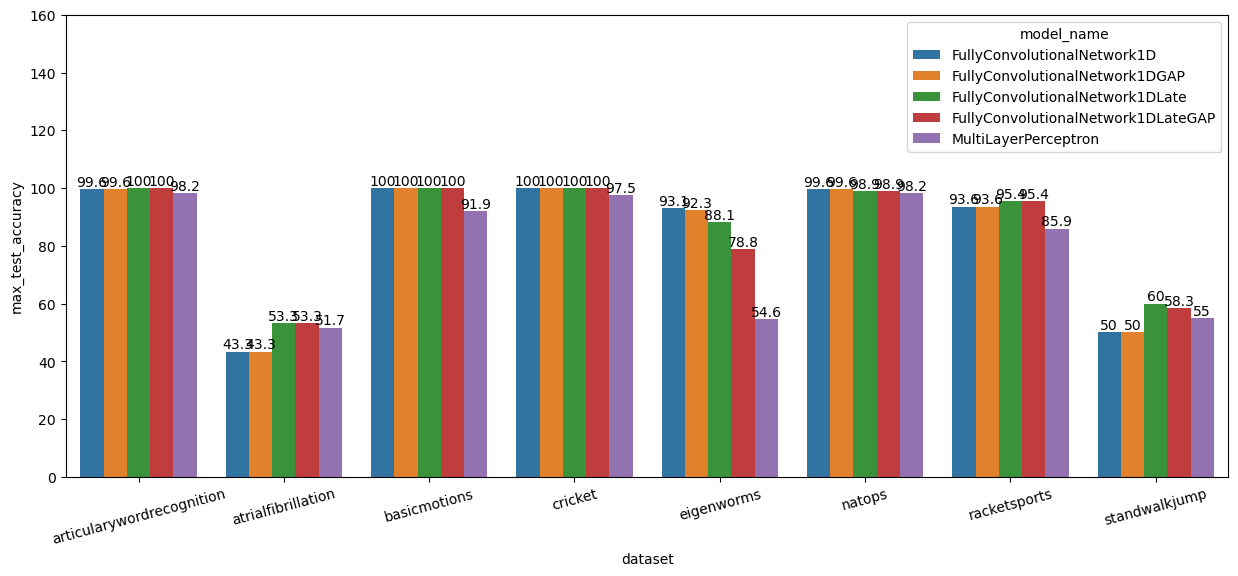

In [173]:
plt.figure(figsize = (15,6))
ax = sns.barplot(
    data = agg_results_data, 
    x = 'dataset', 
    y = 100*agg_results_data['max_test_accuracy'].apply(lambda x: round(x, 3)), 
    hue = 'model_name'
)

for i in ax.containers:
    ax.bar_label(i,)

plt.xticks(rotation = 15)
plt.ylim([0, 100*1.6])
plt.show()